In [1]:
from Arm_Lib import Arm_Device
import time

In [40]:
arm = RoboArm()
arm.reach_down_to_grip_cube()

Connected!


In [41]:
arm.grip_cube()

In [42]:
arm.raise_slightly_for_rotation()

In [ ]:
arm.rotate_gripper_clockwise()

In [ ]:
# class RoboCubeSolver:
    
#     def __init__(self):
#         self.arm = RoboArm()
        
#     def 
    

In [4]:
arm = RoboArm()

Connected!


In [5]:
arm.close_grip()

In [6]:
arm.straight_up()

In [7]:
arm.look_forward()

In [8]:
arm.home()

In [9]:
arm.open_grip()

# Throw Ball Test

In [110]:
# Step 1 straight up

Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    90,   # S2: Shoulder raised upward
    90,  # S3: Elbow straightening
    90,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    30,   # S6: Gripper neutral
    1000  # Move in 1.5s
)

In [134]:
# Step 2 - lunge forward to grab
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    38,   # S2: Shoulder raised upward
    38,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    30,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [135]:
# Step 3 - grip
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    36,   # S2: Shoulder raised upward
    34,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    120,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [136]:
# Step 4 straight up w/ clamped grip

Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    110,   # S2: Shoulder raised upward
    110,  # S3: Elbow straightening
    90,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    120,   # S6: Gripper neutral
    1000  # Move in 1.5s
)

In [137]:
# Step 5 - Release and Lunge forward (Throw)
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    90,   # S2: Shoulder raised upward
    90,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    120,   # S6: Gripper neutral
    100  # Move in 1.5s
)

time.sleep(0.1)

# Step 2 - Release and Lunge forward (Throw)
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    38,   # S2: Shoulder raised upward
    38,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    0,   # S6: Gripper neutral
    300  # Move in 1.5s
)

# Pick Up Cube Test

In [144]:
# Step 1 straight up

Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    90,   # S2: Shoulder raised upward
    90,  # S3: Elbow straightening
    90,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    30,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [50]:
# Step 2 - lunge forward to grab
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    38,   # S2: Shoulder raised upward
    38,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    30,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [51]:
# Step 3 - grab
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    38,   # S2: Shoulder raised upward
    38,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    62,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [52]:
# Step 4 straight up w/ grab

Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    90,   # S2: Shoulder raised upward
    90,  # S3: Elbow straightening
    90,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    60,   # S6: Gripper neutral
    4000  # Move in 1.5s
)

In [53]:
# Step 5 Back down w/ grab

Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    38,   # S2: Shoulder raised upward
    38,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    60,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [54]:
# Step 6 release

Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    38,   # S2: Shoulder raised upward
    38,  # S3: Elbow straightening
    70,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    30,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

# Cube Turning Test

In [207]:
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    60,   # S2: Shoulder raised upward
    35,  # S3: Elbow straightening
    -5,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    0,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [219]:
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    80,   # S2: Shoulder raised upward
    5,  # S3: Elbow straightening
    5,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    60,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

In [220]:
Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    90,   # S2: Shoulder raised upward
    69,  # S3: Elbow straightening
    65,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    60,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

# Camera Stream

In [233]:
# Step 1 straight up

Arm.Arm_serial_servo_write6(
    180,   # S1: Base centered
    0,   # S2: Shoulder raised upward
    60,  # S3: Elbow straightening
    120,   # S4: Wrist pitch neutral
    90,   # S5: Wrist roll neutral
    0,   # S6: Gripper neutral
    1500  # Move in 1.5s
)

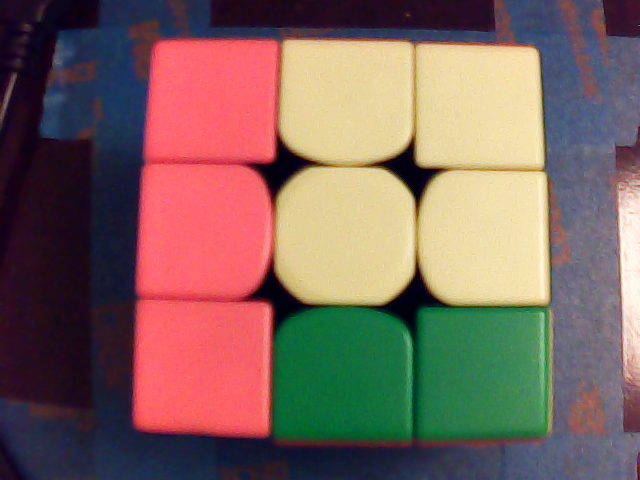

Stopped stream


In [51]:
import cv2
import time
from IPython.display import display, clear_output
from PIL import Image

# ======================
# CONFIG
# ======================
FPS = 30                    # <--- change this
FRAME_INTERVAL = 1.0 / FPS  # seconds per frame

# ======================
# Camera setup
# ======================
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap.release()
    cap = cv2.VideoCapture(1)

if not cap.isOpened():
    raise RuntimeError("Could not open DOFBOT camera")

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Warm up camera
time.sleep(0.3)
for _ in range(10):
    cap.read()

print(f"Streaming at ~{FPS} FPS (Kernel → Interrupt to stop)")

# ======================
# Streaming loop
# ======================
try:
    while True:
        start = time.time()

        ret, frame = cap.read()
        if not ret:
            print("Frame grab failed")
            break

        # BGR → RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        clear_output(wait=True)
        display(Image.fromarray(frame_rgb))

        # Throttle to target FPS
        elapsed = time.time() - start
        sleep_time = FRAME_INTERVAL - elapsed
        if sleep_time > 0:
            time.sleep(sleep_time)

except KeyboardInterrupt:
    print("Stopped stream")

finally:
    cap.release()

Uploaded image to s3://rubiks-cube-face-images/dofbot/captures/img_20251215_235201.jpg


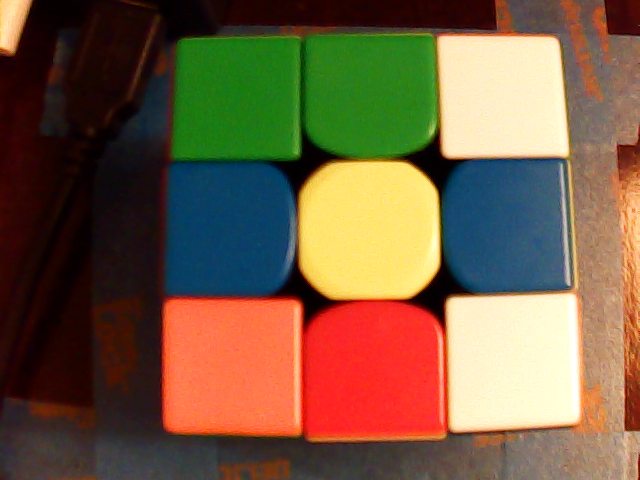

In [14]:
import cv2
import time
import io
import boto3
from datetime import datetime
from IPython.display import display
from PIL import Image
import os

# ======================
# CONFIG
# ======================
S3_BUCKET = "rubiks-cube-face-images"
S3_PREFIX = "dofbot/captures"  # folder-like prefix
REGION = "us-east-1"           # optional but recommended
os.environ["AWS_PROFILE"] = "abhi-personal-mac"

# ======================
# AWS client
# ======================
s3 = boto3.client("s3", region_name=REGION)

# ======================
# Open camera
# ======================
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap.release()
    cap = cv2.VideoCapture(1)

if not cap.isOpened():
    raise RuntimeError("Could not open camera")

# Warm up camera
time.sleep(0.3)
for _ in range(10):
    cap.read()

# Capture frame
ret, frame = cap.read()
cap.release()

if not ret:
    raise RuntimeError("Failed to capture image")

# ======================
# Encode image in memory
# ======================
ts = datetime.now().strftime("%Y%m%d_%H%M%S")
s3_key = f"{S3_PREFIX}/img_{ts}.jpg"

success, buffer = cv2.imencode(".jpg", frame)
if not success:
    raise RuntimeError("Failed to encode image")

image_bytes = buffer.tobytes()

# ======================
# Upload to S3
# ======================
s3.put_object(
    Bucket=S3_BUCKET,
    Key=s3_key,
    Body=image_bytes,
    ContentType="image/jpeg",
)

print(f"Uploaded image to s3://{S3_BUCKET}/{s3_key}")

# ======================
# Display inline
# ======================
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
display(Image.fromarray(frame_rgb))

In [2]:
# import os
# import boto3

# session = boto3.Session(profile_name="abhi-personal-mac")
# s3 = session.client("s3")

# LOCAL_DIR = "captures"
# BUCKET = "rubiks-cube-face-images"
# PREFIX = "dofbot/captures"

# for fname in os.listdir(LOCAL_DIR):
#     if not fname.lower().endswith((".jpg", ".jpeg", ".png")):
#         continue

#     local_path = os.path.join(LOCAL_DIR, fname)
#     s3_key = f"{PREFIX}/{fname}"

#     s3.upload_file(local_path, BUCKET, s3_key)
#     print(f"Uploaded {fname} → s3://{BUCKET}/{s3_key}")

Uploaded img_20251215_224855.jpg → s3://rubiks-cube-face-images/dofbot/captures/img_20251215_224855.jpg
Uploaded img_20251215_224706.jpg → s3://rubiks-cube-face-images/dofbot/captures/img_20251215_224706.jpg
Uploaded img_20251215_224511.jpg → s3://rubiks-cube-face-images/dofbot/captures/img_20251215_224511.jpg
Uploaded img_20251215_224115.jpg → s3://rubiks-cube-face-images/dofbot/captures/img_20251215_224115.jpg
Uploaded img_20251213_210124.jpg → s3://rubiks-cube-face-images/dofbot/captures/img_20251213_210124.jpg
Uploaded img_20251215_223043.jpg → s3://rubiks-cube-face-images/dofbot/captures/img_20251215_223043.jpg
Uploaded img_20251215_224506.jpg → s3://rubiks-cube-face-images/dofbot/captures/img_20251215_224506.jpg
Uploaded img_20251215_224658.jpg → s3://rubiks-cube-face-images/dofbot/captures/img_20251215_224658.jpg
Uploaded img_20251215_224106.jpg → s3://rubiks-cube-face-images/dofbot/captures/img_20251215_224106.jpg
Uploaded img_20251215_224338.jpg → s3://rubiks-cube-face-images/

In [5]:
class RoboArm:
    DEFAULT_MOVE_SPEED = 1000  # ms
    JOINT_ATTRS = ["base", "shoulder", "elbow", "wrist", "wrist_rot", "grip"]

    def __init__(self):
        self.Arm = Arm_Device()
        print("Connected!")
        time.sleep(0.2) # We can't read "ready" state from arm so we just have to wait

        self.move_speed = self.DEFAULT_MOVE_SPEED
        self.recalibrate()

    # ------------------
    # Low-level helpers
    # ------------------

    def adjust(self, angles=None):
        """Send current joint state to the arm"""
        
        if angles is not None:
            self.set_joints(angles)
        
        self.Arm.Arm_serial_servo_write6(
            self.base,
            self.shoulder,
            self.elbow,
            self.wrist,
            self.wrist_rot,
            self.grip,
            self.move_speed
        )

    def reset_move_speed(self):
        self.move_speed = self.DEFAULT_MOVE_SPEED

    def set_move_speed(self, speed_ms=None):
        if speed_ms is not None:
            self.move_speed = int(speed_ms)
            
    def set_unless_none(self, attr, value):
        if value is not None:
            setattr(self, attr, value)

    # ------------------
    # Joint setters
    # ------------------

    def set_base(self, angle):
        self.set_unless_none("base", angle)

    def set_shoulder(self, angle):
        self.set_unless_none("shoulder", angle)

    def set_elbow(self, angle):
        self.set_unless_none("elbow", angle)

    def set_wrist(self, angle):
        self.set_unless_none("wrist", angle)

    def set_wrist_rot(self, angle):
        self.set_unless_none("wrist_rot", angle)

    def set_grip(self, angle):
        self.set_unless_none("grip", angle)

    def set_joints(self, angles):
        assert len(angles) == 6
        
        for i,joint in enumerate(self.JOINT_ATTRS):
            self.set_unless_none(joint, angles[i])

    def get_joints(self):
        """Return current software-tracked pose"""
        return [
            self.base,
            self.shoulder,
            self.elbow,
            self.wrist,
            self.wrist_rot,
            self.grip,
        ]

    # ------------------
    # Calibration / readback
    # ------------------

    def recalibrate(self):
        """Read current servo positions into software state"""
        self.set_unless_none("base", self.Arm.Arm_serial_servo_read(1))
        self.set_unless_none("shoulder", self.Arm.Arm_serial_servo_read(2))
        self.set_unless_none("elbow", self.Arm.Arm_serial_servo_read(3))
        self.set_unless_none("wrist", self.Arm.Arm_serial_servo_read(4))
        self.set_unless_none("wrist_rot", self.Arm.Arm_serial_servo_read(5))
        self.set_unless_none("grip", self.Arm.Arm_serial_servo_read(6))

    # ------------------
    # High-level poses
    # ------------------

    def straight_up(self, speed=None):
        """Arm vertical, safe neutral pose"""
        self.set_move_speed(speed)
        self.adjust([180, 90, 90, 90, 90, None])

    def look_forward(self, speed=None):
        """Camera pointing forward"""
        self.set_move_speed(speed)
        self.adjust([180, 90, 90, 0, 90, None])

    def home(self, speed=None):
        """Relaxed home position"""
        self.set_move_speed(speed)
        self.adjust([180, 130, 20, 30, 90, None])

    def open_grip(self, speed=None):
        self.set_move_speed(speed)
        self.grip = -10
        self.adjust()

    def close_grip(self, speed=None):
        self.set_move_speed(speed)
        self.grip = 180
        self.adjust()
        
    def reach_down_to_grip_cube(self, speed=None):
        self.set_move_speed(speed)
        self.adjust([180, 80, 10, 10, None, None])
        
    def reach_down_to_grip_cube_top(self, speed=None):
        self.set_move_speed(speed)
        self.adjust([180, 80, 10, 10, None, None])
        
    def grip_cube(self, speed=None):
        self.set_move_speed(speed)
        self.grip = 65
        self.adjust()
        
    def raise_slightly_for_rotation(self, speed=None):
        self.set_move_speed(speed)
        self.adjust([180, 90, 20, 0, None, None])
        
    def rotate_gripper_counterclockwise(self, speed=None):
        self.set_move_speed(speed)
        self.wrist_rot = 0
        self.adjust()
        
    def rotate_gripper_clockwise(self, speed=None):
        self.set_move_speed(speed)
        self.wrist_rot = 180
        self.adjust()
        
    def raise_above_cube(self, speed=None):
        self.set_move_speed(speed)
        self.adjust([180, 90, 15, 0, None, None])
        
    def reset_grip_rot(self, speed=None):
        self.set_move_speed(speed)
        self.wrist_rot = 90
        self.adjust()

    # ------------------
    # Incremental motion
    # ------------------

    def nudge(self, joint, delta, speed=None):
        """Increment a joint by delta degrees"""
        if speed:
            self.set_move_speed(speed)

        joints = self.get_joints()
        joints[joint] += delta
        self.set_joints(joints)
        self.adjust()

In [6]:
arm = RoboArm()

Connected!


In [50]:
arm.Arm.Arm_serial_servo_write6(
            180, 100, 10, 0, 90, 0, 100
        )

In [14]:
arm.raise_above_cube()

In [7]:
arm.open_grip()

In [12]:
## Rotate Cube Along Y-Axis

move_time_ms = 100
move_time_s = move_time_ms/1000 + 0.05

arm.set_move_speed(move_time_ms)

arm.open_grip()
time.sleep(move_time_s)

arm.raise_above_cube()
time.sleep(move_time_s)

arm.reset_grip_rot()
time.sleep(move_time_s)

time.sleep(move_time_s)

arm.reach_down_to_grip_cube()
time.sleep(move_time_s)

arm.grip_cube()
time.sleep(move_time_s)

arm.raise_above_cube()
time.sleep(move_time_s)

arm.rotate_gripper_counterclockwise()
time.sleep(move_time_s)

arm.reach_down_to_grip_cube()
time.sleep(move_time_s)

arm.open_grip()
time.sleep(move_time_s)

arm.raise_above_cube()
time.sleep(move_time_s)

arm.reset_grip_rot()
time.sleep(move_time_s)

In [11]:
## Turn Cube Bottom Face

time.sleep(5)

move_time_ms = 200
move_time_s = move_time_ms/1000

arm.set_move_speed(move_time_ms)

arm.open_grip()
time.sleep(move_time_s)

arm.raise_above_cube()
time.sleep(move_time_s)

arm.reset_grip_rot()
time.sleep(move_time_s)

time.sleep(move_time_s)

arm.reach_down_to_grip_cube()
time.sleep(move_time_s)

arm.grip_cube()
time.sleep(move_time_s)

arm.rotate_gripper_counterclockwise()
time.sleep(move_time_s)

arm.open_grip()
time.sleep(move_time_s)

arm.raise_above_cube()
time.sleep(move_time_s)

arm.reset_grip_rot()
time.sleep(move_time_s)

In [278]:
## Turn Cube Top Face

move_time_ms = 300
move_time_s = move_time_ms/1000 + 0.15

arm.set_move_speed(move_time_ms)

arm.open_grip()
time.sleep(move_time_s)

arm.raise_above_cube()
time.sleep(move_time_s)

arm.reset_grip_rot()
time.sleep(move_time_s)

time.sleep(move_time_s)

arm.grip_cube()
time.sleep(move_time_s)

arm.rotate_gripper_counterclockwise()
time.sleep(move_time_s)

arm.open_grip()
time.sleep(move_time_s)

arm.raise_above_cube()
time.sleep(move_time_s)

arm.reset_grip_rot()
time.sleep(move_time_s)

In [248]:
arm.grip_cube()
time.sleep(move_time_s)

In [249]:
arm.raise_above_cube()
time.sleep(move_time_s)

In [250]:
arm.rotate_gripper_counterclockwise()
time.sleep(move_time_s)

In [266]:
arm.grip = -10
arm.adjust()